#Sentiment Analysis

The Social Dilemma, a documentary-drama hybrid explores the dangerous human impact of social
networking, with tech experts sounding the alarm on their own creations as the tech experts
sound the alarm on the dangerous human impact of social networking. This dataset brings you the
twitter responses made with the #TheSocialDilemma hashtag after watching the eye-opening
documentary "The Social Dilemma" released in an OTT platform(Netflix) on September 9th, 2020.
We can categorize the tweets into different groups to identify the sentiment of the users
regarding the documentary.

<p>
<b><u>Attribute Information:</b></u></p>
<p>1. user_name - The name of the user, as they’ve defined it.<p>
2. user_location - The user-defined location for this account’s profile.<p>
3. user_description - The user-defined UTF-8 string describing their account.<p>
4. user_created - Time and date, when the account was created.<p>
5. user_followers - The number of followers an account currently has.<p>
6. user_friends – The number of friends an account currently has.<p>
7. user_favourites - The number of favorites an account currently has.<p>
8. user_verified - When true, indicates that the user has a verified account.<p>
9. date - UTC time and date when the Tweet was created.<p>
10. hashtags - All the other hashtags posted in the tweet along with #TheSocialDilemma<p>
11. source - Utility used to post the Tweet, Tweets from the Twitter website have a source
value – web<p>
12. is_retweet - Indicates whether this Tweet has been Retweeted by the authenticating user.
13. clean_text – Cleaned text of the tweet.<p>
14. Sentiment (target) - Indicates the sentiment of the tweet, consists of three categories:
Positive, neutral, and negative.<p>

## Importing Necessary Libraries

In [ ]:
!pip install Tensorflow==2.4.1

In [ ]:
!pip install -q -U keras-tuner

In [3]:
import pandas as pd
import numpy as np
import re 
from sklearn.metrics import cohen_kappa_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix , accuracy_score, classification_report
from tensorflow import keras
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Dense, GlobalMaxPooling1D
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import  Embedding, SimpleRNN
from tensorflow.keras.models import Sequential
from sklearn.preprocessing import LabelEncoder
from keras_tuner import RandomSearch
from keras_tuner.engine.hyperparameters import HyperParameters
from tensorflow.keras.optimizers import Adam
import tensorflow as tf

import itertools
import os
import seaborn as sns
import warnings

warnings.filterwarnings("ignore")
sns.set()

##Mounting google drive to retrieve the data later

In [4]:
from google.colab import drive
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


##Specifying the directory

In [6]:
os.chdir("/content/drive/MyDrive/Colab Notebooks/Sentiment Analysis")

##Extracting the data from the specified directory

In [7]:
train_df = pd.read_csv("tweets_train.csv")
test_df = pd.read_csv("tweets_test.csv")

##EDA and Data Cleaning

In [8]:
train_df.shape

(17000, 14)

In [9]:
test_df.shape

(3068, 13)

In [10]:
train_df

,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,hashtags,source,is_retweet,clean_text,Sentiment
0,Romy 👑,Bolton - England,"Tables turn, bridges burn, you live and learn.",2009-06-15 09:00:39,525,896,3854,False,2020-09-19 15:19:32,['TheSocialDilemma'],Twitter for Android,False,TheSocialDilemma is an eye opener isn t it ple...,Neutral
1,TLynn Peterson,"Black Canyon City, Arizona",Acquired disability ♿ after an accident. Livin...,2013-05-29 00:17:46,5045,5374,48152,False,2020-09-13 00:31:46,['TheSocialDilemma'],Twitter for Android,False,TheSocialDilemma If we don t agree on what is ...,Positive
2,Rutger Kosters,Netherlands,Cloud Solution Architect @NetApp | VCDX #209 |...,2014-10-07 09:34:10,574,251,1070,False,2020-09-09 21:10:33,['TheSocialDilemma'],Twitter for Android,False,Watching TheSocialDilemma scary to see social ...,Negative
3,IDFWU🗯🇿🇼🇿🇦,"East London, South Africa","YOU HAVE OPTIONS, YOU CAN’T JUST TAKE WHAT LIF...",2012-08-22 11:09:06,706,618,1320,False,2020-09-11 04:33:08,NaN,Twitter for Android,False,You check your social media before you pee in ...,Positive
4,Treebel,NaN,NaN,2010-09-25 07:25:31,9,13,55,False,2020-09-17 16:27:38,['thesocialdilemma'],Twitter for iPhone,False,watch thesocialdilemma and see what s actually...,Negative
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16995,Ra'Chelle Rogers,Philadelphia/New York,mom. media. art. Publicist. Philly. Opinions e...,2009-05-22 13:34:14,387,400,1274,False,2020-09-13 22:12:29,['TheSocialDilemma'],Twitter for iPhone,False,Watching TheSocialDilemma,Neutral
16996,Mike Lynch,"Boston, MA, USA",higher education professional . educator . doc...,2009-04-27 01:16:09,4444,4995,52692,False,2020-09-20 15:17:14,['TheSocialDilemma'],Twitter for iPhone,False,If you re not paying for the product you are t...,Neutral
16997,James Baldwin was a genius.,"Terra-Belle, USA",Class based policies won't fix the racial weal...,2012-10-05 23:27:21,879,1456,50103,False,2020-09-19 14:04:32,['TheSocialDilemma'],Twitter Web App,False,Watching TheSocialDilemma Let s see,Neutral
16998,Johan - SocialMediaBreakup,"Dublin City, Ireland",Helping people to beat their compulsive phone ...,2018-10-25 22:21:17,1009,1283,19290,False,2020-09-18 15:37:00,['TheSocialDilemma'],TweetDeck,False,Yes TheSocialDilemma what a perfect time to be...,Positive


In [11]:
train_df["clean_text"][0]

'TheSocialDilemma is an eye opener isn t it please ignore the irony of me tweeting about it'

In [12]:
final_train = train_df[["clean_text", "Sentiment"]]
final_train

,clean_text,Sentiment
0,TheSocialDilemma is an eye opener isn t it ple...,Neutral
1,TheSocialDilemma If we don t agree on what is ...,Positive
2,Watching TheSocialDilemma scary to see social ...,Negative
3,You check your social media before you pee in ...,Positive
4,watch thesocialdilemma and see what s actually...,Negative
...,...,...
16995,Watching TheSocialDilemma,Neutral
16996,If you re not paying for the product you are t...,Neutral
16997,Watching TheSocialDilemma Let s see,Neutral
16998,Yes TheSocialDilemma what a perfect time to be...,Positive


###Finding null values

In [13]:
final_train.isnull().sum()

clean_text    8
Sentiment     0
dtype: int64

In [14]:
final_train[final_train["clean_text"].isnull()]

,clean_text,Sentiment
997,NaN,Neutral
2460,NaN,Neutral
4130,NaN,Neutral
5817,NaN,Neutral
9121,NaN,Neutral
9375,NaN,Neutral
15791,NaN,Neutral
16462,NaN,Neutral


In [15]:
final_train.dropna(inplace=True)

In [16]:
final_train.isnull().sum()

clean_text    0
Sentiment     0
dtype: int64

###Cleaning the test data

In [17]:
test_df

,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,hashtags,source,is_retweet,clean_text
0,Doug Webb,Probably Europe,"I develop methods for effective cooperation, w...",2015-12-12 15:22:58,157,228,496,False,2020-09-15 22:53:36,"['theSocialDilemma', 'joinMastodon']",Twitter Web App,False,Watch theSocialDilemma then joinMastodon
1,Dan Reynish,"Medicine Hat, Alberta",News Anchor at Noon and 5 pm on CHAT TV. Canad...,2011-09-10 12:17:10,1722,2500,13912,False,2020-09-12 04:43:03,['WeTheNorth'],Twitter Web App,False,With the 2019 2020 NBA season officially over ...
2,🌤,NaN,NaN,2011-06-01 02:23:57,880,585,205,False,2020-09-19 07:06:53,['TheSocialDilemma'],Twitter for iPhone,False,if you want to really know about people go tal...
3,“IT IS WHAT IT IS.”🇰🇪🇳🇿🇺🇸,WA,Heliophile🌞☀️• #Rugby • Wildlifer • #HIV • #So...,2009-04-17 13:35:02,1143,2692,11999,False,2020-09-12 18:28:18,"['TheSocialDilemma', 'Netflix']",Twitter for iPhone,False,Have you watched TheSocialDilemma on Netflix
4,Mahima Sood,NaN,Amy Dunne X Holly Golightly || Data Scientist ...,2018-01-26 21:57:22,18,65,263,False,2020-09-12 18:48:53,['TheSocialDilemma'],Twitter for iPhone,False,Highly recommend TheSocialDilemma on
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3063,𝘔𝘶𝘳𝘪;🦋,𝘶𝘯𝘥𝘦𝘳 𝘵𝘩𝘦 𝘱𝘢𝘭𝘮𝘴🌴,𝘸𝘪𝘧𝘦 // 𝘤𝘢𝘵 𝘮𝘰𝘮 // 𝘱𝘴𝘺𝘤𝘩𝘰𝘭𝘰𝘨𝘪𝘴𝘵; 🧠 𝘣𝘦𝘢𝘤𝘩𝘣𝘶𝘮;🌴,2009-07-29 03:18:16,942,357,9917,False,2020-09-14 12:27:35,['TheSocialDilemma'],Twitter for iPhone,False,Everybody should watch TheSocialDilemma
3064,Didi Crawford,"Birmingham, England",Traveller | Blogger | Currently growing a huma...,2011-12-06 09:24:20,468,1095,3440,False,2020-09-22 19:25:48,['TheSocialDilemma'],Twitter for iPhone,False,Enjoyed TheSocialDilemma Then read this
3065,Ritwik Arora,NaN,"Spent the last 30 minutes writing this bio, ch...",2020-10-13 01:12:06,10,137,106,False,2020-10-13 02:41:26,['TheSocialDilemma'],Twitter for Android,False,Couldn t stop thinking about docu TheSocialDil...
3066,Nishant Mody,Mumbai,"I love music, dogs, nature, politics & marketi...",2012-12-30 04:58:15,174,541,5482,False,2020-09-10 17:19:44,['TheSocialDilemma'],Twitter for iPhone,False,This was the best one by on TheSocialDilemma on


In [18]:
final_test = test_df["clean_text"]
final_test

0                Watch theSocialDilemma then joinMastodon
1       With the 2019 2020 NBA season officially over ...
2       if you want to really know about people go tal...
3            Have you watched TheSocialDilemma on Netflix
4                    Highly recommend TheSocialDilemma on
                              ...                        
3063              Everybody should watch TheSocialDilemma
3064              Enjoyed TheSocialDilemma Then read this
3065    Couldn t stop thinking about docu TheSocialDil...
3066      This was the best one by on TheSocialDilemma on
3067                      TheSocialDilemma on Netflix wow
Name: clean_text, Length: 3068, dtype: object

###Plotting a graph based on different types of text

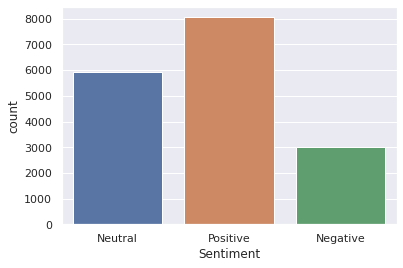

In [19]:
sns.countplot(final_train["Sentiment"])
plt.show()

The data is slightly imbalance with Positive texts being the highest and Negative being the lowest

In [20]:
final_train.Sentiment.value_counts()

Positive    8059
Neutral     5919
Negative    3014
Name: Sentiment, dtype: int64

In [21]:
Neu = round(final_train["Sentiment"].value_counts()["Neutral"]/len(final_train)*100,2)
Neg = round(final_train["Sentiment"].value_counts()["Negative"]/len(final_train)*100,2)
Pos = round(final_train["Sentiment"].value_counts()["Positive"]/len(final_train)*100,2)

print('This train_dataset contain {}% Neutral Sentiment tweet'.format(Neu))
print('This train_dataset contain {}% Negative Sentiment tweet'.format(Neg))
print('This train_dataset contain {}% Positive Sentiment tweet'.format(Pos))

This train_dataset contain 34.83% Neutral Sentiment tweet
This train_dataset contain 17.74% Negative Sentiment tweet
This train_dataset contain 47.43% Positive Sentiment tweet


### Label Encoding the labels and creating a dictionary of the mapping

In [22]:
le = LabelEncoder()
le.fit(final_train["Sentiment"])
label_mapping = dict(zip(le.transform(le.classes_), le.classes_))
label_mapping

{0: 'Negative', 1: 'Neutral', 2: 'Positive'}

In [23]:
final_train["Label"] = le.transform(final_train["Sentiment"])
final_train

,clean_text,Sentiment,Label
0,TheSocialDilemma is an eye opener isn t it ple...,Neutral,1
1,TheSocialDilemma If we don t agree on what is ...,Positive,2
2,Watching TheSocialDilemma scary to see social ...,Negative,0
3,You check your social media before you pee in ...,Positive,2
4,watch thesocialdilemma and see what s actually...,Negative,0
...,...,...,...
16995,Watching TheSocialDilemma,Neutral,1
16996,If you re not paying for the product you are t...,Neutral,1
16997,Watching TheSocialDilemma Let s see,Neutral,1
16998,Yes TheSocialDilemma what a perfect time to be...,Positive,2


In [24]:
final_train = final_train[["clean_text", "Label"]]
final_train

,clean_text,Label
0,TheSocialDilemma is an eye opener isn t it ple...,1
1,TheSocialDilemma If we don t agree on what is ...,2
2,Watching TheSocialDilemma scary to see social ...,0
3,You check your social media before you pee in ...,2
4,watch thesocialdilemma and see what s actually...,0
...,...,...
16995,Watching TheSocialDilemma,1
16996,If you re not paying for the product you are t...,1
16997,Watching TheSocialDilemma Let s see,1
16998,Yes TheSocialDilemma what a perfect time to be...,2


## Data Encoding

In [25]:
train_dataset = (
    tf.data.Dataset.from_tensor_slices(
        (
            tf.cast(final_train["clean_text"].values, tf.string),
            tf.cast(final_train['Label'].values, tf.int32)
        )
    )
)

In [26]:
vocab = 1000
encoder = tf.keras.layers.experimental.preprocessing.TextVectorization(max_tokens=vocab)
encoder.adapt(train_dataset.map(lambda text, label: text))

In [27]:
voc = np.array(encoder.get_vocabulary())
voc[0:20]

array(['', '[UNK]', 'thesocialdilemma', 'the', 'i', 'to', 'on', 'and',
       'you', 'a', 'is', 'it', 'social', 'watch', 'of', 'netflix', 's',
       'this', 'media', 'that'], dtype='<U16')

In [28]:
encoder("Social Dilemma is a myth").numpy()

array([12, 34, 10,  9,  1])

## Building the model

In [29]:
def build_model(hp):
    model = Sequential()
    model.add(encoder)
    model.add(Embedding(input_dim = len(voc), output_dim = 64, mask_zero= True))
    model.add(SimpleRNN(units = 64))
    model.add(Dense(units=hp.Int('dense_1_units', min_value=32, max_value=128, step=16),activation='relu'))
    model.add(Dense(units=hp.Int('dense_2_units', min_value=32, max_value=128, step=16),activation='relu'))
    model.add(Dense(units=3, activation = "softmax"))
    model.compile(optimizer=Adam(hp.Choice('learning_rate', values=[1e-2, 1e-3])), loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    return model

##Hyperparameter Tuning

In [30]:
tuner_search=RandomSearch(build_model,
                          objective='accuracy', max_trials= 10, directory='output',
                          project_name="Sentiment_Analysis")

INFO:tensorflow:Reloading Oracle from existing project output/Sentiment_Analysis/oracle.json


In [32]:
tuner_search.search(final_train["clean_text"], final_train["Label"] ,epochs=15,validation_split=0.2)

Trial 11 Complete [00h 05m 07s]
accuracy: 0.7277275323867798

Best accuracy So Far: 0.9873464107513428
Total elapsed time: 00h 51m 31s
INFO:tensorflow:Oracle triggered exit


##Splitting the data

In [33]:
x_train, x_val, y_train, y_val = train_test_split(final_train["clean_text"], final_train["Label"], random_state = 10, test_size = 0.1)

In [34]:
x_train.shape

(15292,)

In [35]:
x_val.shape

(1700,)

In [36]:
y_train.shape

(15292,)

In [37]:
y_val.shape

(1700,)

##Building the model based on the best value from hyperparameter tuning

In [38]:
model = Sequential()
model.add(encoder)
model.add(Embedding(input_dim = len(voc), output_dim = 64, mask_zero= True))
model.add(SimpleRNN(units = 64))
model.add(Dense(units=64,activation='relu'))
model.add(Dense(units=112,activation='relu'))
model.add(Dense(units=3, activation = "softmax"))
model.compile(optimizer=Adam(learning_rate=0.001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [39]:
Epochs = 50
M1 = model.fit(x = x_train, y = y_train, validation_data = (x_val, y_val), epochs= Epochs)

Epoch 1/50
478/478 [==============================] - 49s 96ms/step - loss: 0.8101 - accuracy: 0.6474 - val_loss: 0.4683 - val_accuracy: 0.8282
Epoch 2/50
478/478 [==============================] - 21s 44ms/step - loss: 0.4045 - accuracy: 0.8577 - val_loss: 0.4062 - val_accuracy: 0.8688
Epoch 3/50
478/478 [==============================] - 21s 45ms/step - loss: 0.3157 - accuracy: 0.8915 - val_loss: 0.3997 - val_accuracy: 0.8629
Epoch 4/50
478/478 [==============================] - 22s 45ms/step - loss: 0.2410 - accuracy: 0.9167 - val_loss: 0.4616 - val_accuracy: 0.8647
Epoch 5/50
478/478 [==============================] - 22s 46ms/step - loss: 0.1904 - accuracy: 0.9312 - val_loss: 0.4614 - val_accuracy: 0.8571
Epoch 6/50
478/478 [==============================] - 22s 47ms/step - loss: 0.1376 - accuracy: 0.9535 - val_loss: 0.5264 - val_accuracy: 0.8576
Epoch 7/50
478/478 [==============================] - 21s 45ms/step - loss: 0.1234 - accuracy: 0.9576 - val_loss: 0.5679 - val_accuracy:

##Model Accuracy

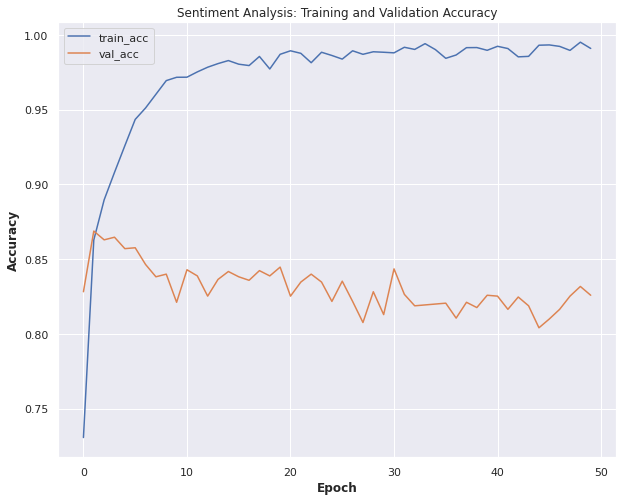

In [40]:
plt.figure(figsize = [10,8])
plt.plot(np.arange(0, Epochs), M1.history["accuracy"], label="train_acc")
plt.plot(np.arange(0, Epochs), M1.history["val_accuracy"], label="val_acc")
plt.title("Sentiment Analysis: Training and Validation Accuracy")
plt.xlabel("Epoch", weight="bold")
plt.ylabel("Accuracy", weight="bold")
plt.legend()
plt.show()

 Model Loss

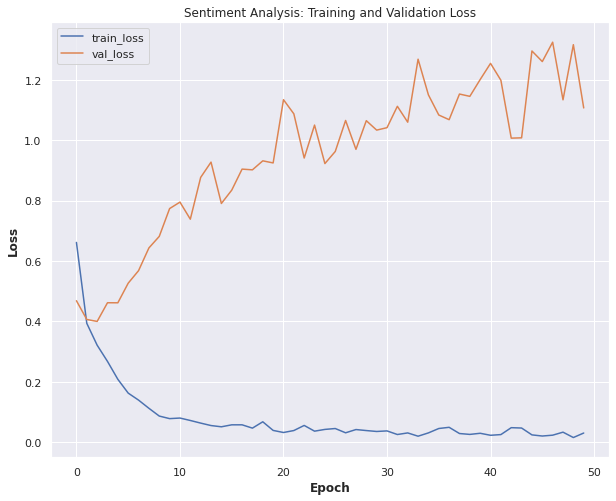

In [41]:
plt.figure(figsize = [10,8])
plt.plot(np.arange(0, Epochs), M1.history["loss"], label="train_loss")
plt.plot(np.arange(0, Epochs), M1.history["val_loss"], label="val_loss")
plt.title("Sentiment Analysis: Training and Validation Loss")
plt.xlabel("Epoch", weight="bold")
plt.ylabel("Loss", weight="bold")
plt.legend()
plt.show()

##Predicting validation dataset for model evaluation

In [42]:
y_pred_proba = model.predict(x_val)
y_pred_proba

array([[5.6486964e-01, 6.9938594e-04, 4.3443099e-01],
       [4.8020910e-03, 9.9428976e-01, 9.0820325e-04],
       [3.5295971e-03, 4.0154122e-05, 9.9643022e-01],
       ...,
       [2.7748974e-09, 1.2811071e-07, 9.9999988e-01],
       [1.1664925e-03, 3.3108348e-03, 9.9552274e-01],
       [1.0419876e-02, 4.0085386e-03, 9.8557162e-01]], dtype=float32)

In [43]:
y_pred = []
for i in y_pred_proba:
    y_pred.append(np.argmax(i))

##Model Evaluation

In [44]:
def model_evaluation(y_test, y_pred):
    print("Cohen Kappa Score: ", cohen_kappa_score(y_test, y_pred))
    print("Classification Report--> \n", classification_report(y_true= y_test, y_pred= y_pred))
    cm =confusion_matrix(y_test, y_pred)
    confusion = pd.DataFrame(cm, columns = ["Negative", "Neutral", "Positive"], index = ["Negative", "Neutral", "Positive"])
    sns.heatmap(confusion, annot = True, fmt = "d")
    plt.xlabel("Predicted Class")
    plt.ylabel("Actual Class")
    plt.tight_layout()
    plt.show()

Cohen Kappa Score:  0.72000002225755
Classification Report--> 
               precision    recall  f1-score   support

           0       0.66      0.65      0.65       306
           1       0.87      0.87      0.87       585
           2       0.86      0.86      0.86       809

    accuracy                           0.83      1700
   macro avg       0.79      0.79      0.79      1700
weighted avg       0.83      0.83      0.83      1700



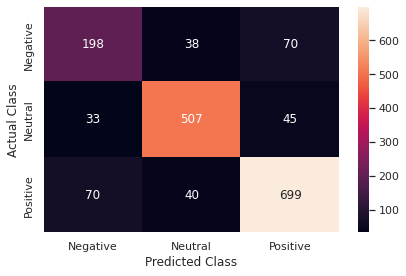

In [45]:
model_evaluation(y_test = y_val, y_pred = y_pred)

##Handling null values in the test dataset

In [46]:
final_test.isnull().sum()

1

In [47]:
final_test.dropna(inplace=True)

##Making Predictions on test dataset

In [48]:
y_pred_test_proba = model.predict(final_test)
y_pred_test_proba

array([[3.3412418e-01, 6.6544700e-01, 4.2882550e-04],
       [5.3685999e-05, 9.9991322e-01, 3.3088108e-05],
       [1.1669664e-07, 7.9608427e-08, 9.9999976e-01],
       ...,
       [8.8457662e-01, 3.1480815e-02, 8.3942533e-02],
       [4.7631404e-01, 2.4776610e-02, 4.9890935e-01],
       [6.2776300e-05, 1.6240394e-04, 9.9977487e-01]], dtype=float32)

In [49]:
y_pred_test = []
for i in y_pred_test_proba:
    y_pred_test.append(np.argmax(i))

In [50]:
for i in range(0,10):
    print("Statement:-> \n", final_test[i])
    print("Prediction:", label_mapping[y_pred_test[i]])

Statement:-> 
 Watch theSocialDilemma then joinMastodon
Prediction: Neutral
Statement:-> 
 With the 2019 2020 NBA season officially over for my beloved well done guys WeTheNorth I m back in
Prediction: Neutral
Statement:-> 
 if you want to really know about people go talk with him dont judge a person by only looking for in his social media TheSocialDilemma
Prediction: Positive
Statement:-> 
 Have you watched TheSocialDilemma on Netflix
Prediction: Neutral
Statement:-> 
 Highly recommend TheSocialDilemma on
Prediction: Positive
Statement:-> 
 Have you ever notce how much time you waste away scrolling on social media Its addictive and there aregood reasons
Prediction: Positive
Statement:-> 
 Hey Twitter AIs out there do a healthy thing for us once in a while what about increasing awareness on the dan
Prediction: Neutral
Statement:-> 
 Just watched TheSocialDilemma appreciate the irony of posting after watching but definitely given me some ideas f
Prediction: Neutral
Statement:-> 
 Anyone

In [ ]:
!pip install gradio

In [68]:
import gradio as gr
def predict_text(text):
    final= model.predict([text])
    final = np.argmax(final)
    print(label_mapping[final])
    
    return label_mapping[final]

im = gr.inputs.Textbox(lines=1, placeholder=None, default="", label=None, optional=False)
label = gr.outputs.Label()

gr.Interface(fn=predict_text, inputs=im, outputs=label, capture_session=True, title="Sentiment Analysis").launch(share=True)

Colab notebook detected. To show errors in colab notebook, set `debug=True` in `launch()`
Running on public URL: https://29367.gradio.app

This share link expires in 72 hours. For free permanent hosting, check out Spaces (https://huggingface.co/spaces)


(<fastapi.applications.FastAPI at 0x7f56c3eb7f10>,
 'http://127.0.0.1:7863/',
 'https://29367.gradio.app')